In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import train_test_split

from regression import normalEquation, logisticCost, linear, extendMatrix, logisticGradient
from statistics import normalizeFeature, sigmoid

style.use('fivethirtyeight')


In [2]:

df = pd.read_csv('datasets/breast_cancer.csv', header=None).sample(frac=1)
#
X = np.array(df.drop(columns=9, axis=1).T)
y = np.array(df.loc[:, 9])

# Remap the values to within the set [0,1].
y = [[0, 0, 0, 1, 1, 1][y_] for y_ in y]

# Normalized the values.
NormRandX = np.array(normalizeFeature(X))


In [3]:


def run(x_train, x_test, y_train, y_test):
    # Linear logistic function.
    Xe = extendMatrix(x_train, False, True)
    # Get the shape of the beta.
    linearBeta = normalEquation(Xe, y_train)

    alphaSet = [0.9, 0.5, 0.1, 0.05, 0.01, 0.005]
    alphaC = ['r', 'g', 'b', 'y', 'c', 'k']
    costs = []
    for i, alpha in enumerate(alphaSet):
        lineX = []
        lineY = []
        for n in range(1, 2000, 100):
            optimized = logisticGradient(Xe, linearBeta, y_train, alpha, n)
            combinationCost = logisticCost(Xe, optimized, y_train, linear)

            lineX.append(float(n))
            lineY.append(combinationCost)
            costs.append([combinationCost, optimized])
            print("alpha {}, iterations: {} J(B) : {}".format(
                alpha, n, round(combinationCost, 7)))

        plt.plot(lineX, lineY, color=alphaC[i], label="{}".format(alpha))
        plt.xlabel("iterations")
        plt.ylabel("cost")
        plt.legend(loc='upper left')
        plt.title("Cost in respect to number of iterations".format(alpha))
        plt.suptitle("breast_cancer.csv")
        plt.ylim(min(lineY) - 0.5, max(lineY) + 0.5)
    plt.show()

    # Determine the best theta.
    sortedCost = sorted(costs, key=itemgetter(0))
    cost, beta = sortedCost[0]
    print("The best beta {}, cost = {}".format(beta.tolist(), cost))

    threshold = 0.5
    accuracy = 0
    predictions = []
    for _x, _y in zip(x_test, y_test):
        p = sigmoid(linear(beta, _x))

        if p > threshold:
            p = 1
        else:
            p = 0
        predictions.append(p)
        if p == _y:
            accuracy = accuracy + 1

    cm = metrics.confusion_matrix(y_test, predictions)
    print(cm)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, predictions))
    print("Recall:", metrics.recall_score(y_test, predictions))

    # Compute the accuracy
    accuracyRate = accuracy / len(y_test)
    print("Accuracy: ", accuracyRate)


No Shuffle
alpha 0.9, iterations: 1 J(B) : 0.1176661
alpha 0.9, iterations: 101 J(B) : 0.0758483
alpha 0.9, iterations: 201 J(B) : 0.0733594
alpha 0.9, iterations: 301 J(B) : 0.0730193
alpha 0.9, iterations: 401 J(B) : 0.0729291
alpha 0.9, iterations: 501 J(B) : 0.0729002
alpha 0.9, iterations: 601 J(B) : 0.0728901
alpha 0.9, iterations: 701 J(B) : 0.0728864
alpha 0.9, iterations: 801 J(B) : 0.072885
alpha 0.9, iterations: 901 J(B) : 0.0728845
alpha 0.9, iterations: 1001 J(B) : 0.0728843
alpha 0.9, iterations: 1101 J(B) : 0.0728842
alpha 0.9, iterations: 1201 J(B) : 0.0728841
alpha 0.9, iterations: 1301 J(B) : 0.0728841
alpha 0.9, iterations: 1401 J(B) : 0.0728841
alpha 0.9, iterations: 1501 J(B) : 0.0728841
alpha 0.9, iterations: 1601 J(B) : 0.0728841
alpha 0.9, iterations: 1701 J(B) : 0.0728841
alpha 0.9, iterations: 1801 J(B) : 0.0728841
alpha 0.9, iterations: 1901 J(B) : 0.0728841
alpha 0.5, iterations: 1 J(B) : 0.1182354
alpha 0.5, iterations: 101 J(B) : 0.0829904
alpha 0.5, itera

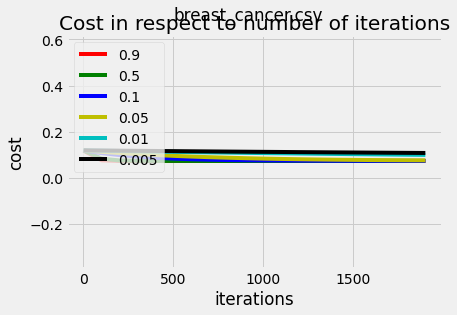

The best beta [-1.0299431932053296, 1.2738510182827116, 0.578954112793044, 0.514111154501809, 0.8705095264039782, 0.31173985444391, 1.5586311724160478, 1.2111345740256956, 0.3973635301153074, 0.9242519905407772], cost = 0.07288410888215453
[[87  3]
 [ 2 45]]
Precision: 0.9375
Recall: 0.9574468085106383
Accuracy:  0.9635036496350365
Shuffle
alpha 0.9, iterations: 1 J(B) : 0.1183974
alpha 0.9, iterations: 101 J(B) : 0.0683395
alpha 0.9, iterations: 201 J(B) : 0.0653085
alpha 0.9, iterations: 301 J(B) : 0.0646345
alpha 0.9, iterations: 401 J(B) : 0.0643638
alpha 0.9, iterations: 501 J(B) : 0.0642329
alpha 0.9, iterations: 601 J(B) : 0.0641621
alpha 0.9, iterations: 701 J(B) : 0.0641203
alpha 0.9, iterations: 801 J(B) : 0.0640942
alpha 0.9, iterations: 901 J(B) : 0.0640771
alpha 0.9, iterations: 1001 J(B) : 0.0640657
alpha 0.9, iterations: 1101 J(B) : 0.0640578
alpha 0.9, iterations: 1201 J(B) : 0.0640524
alpha 0.9, iterations: 1301 J(B) : 0.0640487
alpha 0.9, iterations: 1401 J(B) : 0.064

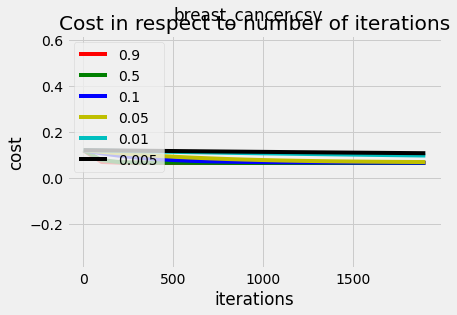

The best beta [-1.1989614474690997, 1.6835126398558875, -0.20482830591267692, 0.8389651696104978, 1.4032681869260137, 0.31791011597527463, 1.4843996080597608, 1.3419556613062114, 0.6487970599238992, 1.4151084419312268], cost = 0.06404103394083403
[[79  2]
 [ 4 52]]
Precision: 0.9629629629629629
Recall: 0.9285714285714286
Accuracy:  0.9562043795620438


In [4]:

print("No Shuffle")
x_train, x_test, y_train, y_test = train_test_split(
    NormRandX.T, y, test_size=0.20, shuffle=False)
run(x_train.T, x_test, y_train, y_test)

print("Shuffle")
x_train, x_test, y_train, y_test = train_test_split(
    NormRandX.T, y, test_size=0.20, shuffle=True)
run(x_train.T, x_test, y_train, y_test)
